<a href="https://colab.research.google.com/github/Ashail33/Masters-work/blob/master/Weighted_consesnsus_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from scipy.spatial.distance import cdist
import itertools


def consensus_clustering(data, n_clusters, n_models, weights=None):
    if weights is None:
        weights = np.ones(n_models)

    if len(weights) != n_models:
        raise ValueError("The number of weights must be equal to the number of models.")

    if np.sum(weights) != 1:
        weights = weights / np.sum(weights)

    n_samples, n_features = data.shape

    co_association_matrix = np.zeros((n_samples, n_samples))

    for i in range(n_models):
        kmeans = KMeans(n_clusters=n_clusters).fit(data)
        labels = kmeans.labels_
        for label in range(n_clusters):
            cluster_indices = np.where(labels == label)[0]
            pairs = list(itertools.combinations(cluster_indices, 2))
            for pair in pairs:
                co_association_matrix[pair] += weights[i]

    final_labels = np.zeros(n_samples, dtype=int)

    for i in range(n_clusters):
        indices = np.argsort(-co_association_matrix.sum(axis=1))[:n_samples // n_clusters]
        final_labels[indices] = i
        co_association_matrix[indices, :] = 0
        co_association_matrix[:, indices] = 0

    return final_labels


# if __name__ == "__main__":
#     n_samples = 1000
#     n_features = 2
#     n_clusters = 3
#     n_models = 5
#     weights = np.array([0.3, 0.25, 0.2, 0.15, 0.1])

#     # Generate sample data
#     data, true_labels = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)

#     # Perform weighted consensus clustering
#     final_labels = consensus_clustering(data, n_clusters, n_models, weights)

#     print("Final cluster labels:")
#     print(final_labels)


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Create a synthetic high-dimensional dataset with well-separated subspaces
n_features = 5
n_samples_per_cluster = 1000
n_clusters_synthetic = 3
X_synthetic, y_synthetic = make_blobs(n_samples=n_samples_per_cluster * n_clusters_synthetic,
                                      n_features=n_features, centers=n_clusters_synthetic, random_state=42)
X_synthetic = X_synthetic.T

# # # Apply initial SS-SSC
# cluster_assignments_synthetic = ss_ssc(X_synthetic, n_clusters_synthetic,k=100)
# ari_synthetic = adjusted_rand_score(y_synthetic, cluster_assignments_synthetic)
# print(f"Adjusted Rand Index (ARI) for initial SS-SSC on synthetic dataset: {ari_synthetic:.4f}")

# # # Apply initial SS-SSC elasticnet
# cluster_assignments_synthetic = ss_ssc_elastic_net(X_synthetic, n_clusters_synthetic,k=900,l1_ratio=0.1,alpha=3.437e-04)
# ari_synthetic = adjusted_rand_score(y_synthetic, cluster_assignments_synthetic)
# print(f"Adjusted Rand Index (ARI) for initial SS-SSC on synthetic dataset: {ari_synthetic:.4f}")

kmeans = KMeans(n_clusters=n_clusters_synthetic, random_state=0)
synthetic_kmeans = consensus_clustering(data=X_synthetic.T, n_clusters=3, n_models=5, weights=[0.1,0.1,0.1,0.1,0.1])
ari_synthetic_kmeans = adjusted_rand_score(y_synthetic, synthetic_kmeans)
print(f"Adjusted Rand Index (ARI) for kmeans on synthetic dataset after PCA: {ari_synthetic_kmeans:.4f}")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Adjusted Rand Index (ARI) for kmeans on synthetic dataset after PCA: -0.0007


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

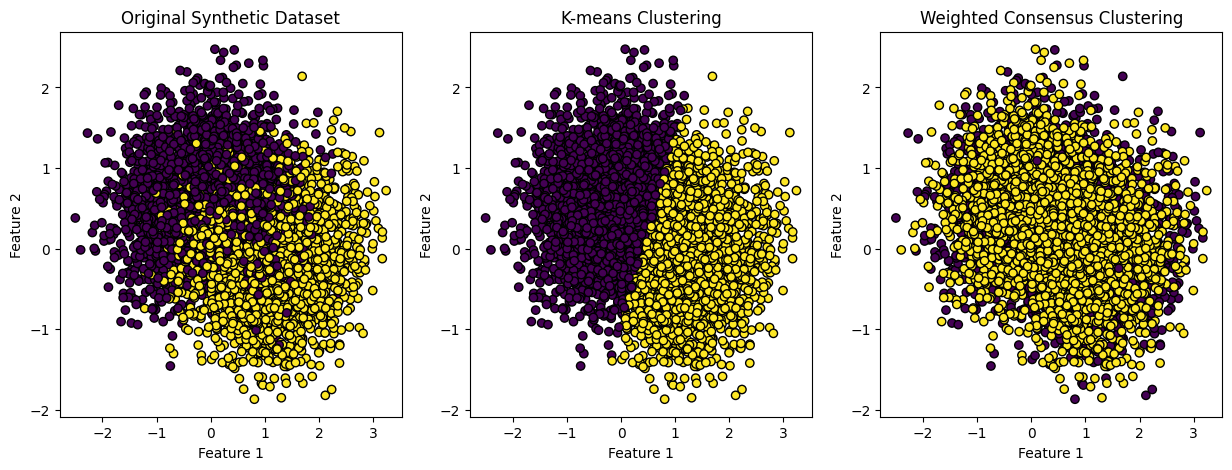

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

# Add the consensus_clustering function here.

# Generate synthetic dataset with complex structure
data, true_labels = make_moons(n_samples=5000, noise=0.5, random_state=42)

# Apply k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

# Apply weighted consensus clustering
n_clusters = 2
n_models = 5
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
consensus_labels = consensus_clustering(data, n_clusters, n_models, weights)

# Plot the results
plt.figure(figsize=(15, 5))

# Original synthetic dataset
plt.subplot(1, 3, 1)
plt.scatter(data[:, 0], data[:, 1], c=true_labels, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Synthetic Dataset')

# K-means clustering result
plt.subplot(1, 3, 2)
plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')

# Weighted consensus clustering result
plt.subplot(1, 3, 3)
plt.scatter(data[:, 0], data[:, 1], c=consensus_labels, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Weighted Consensus Clustering')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

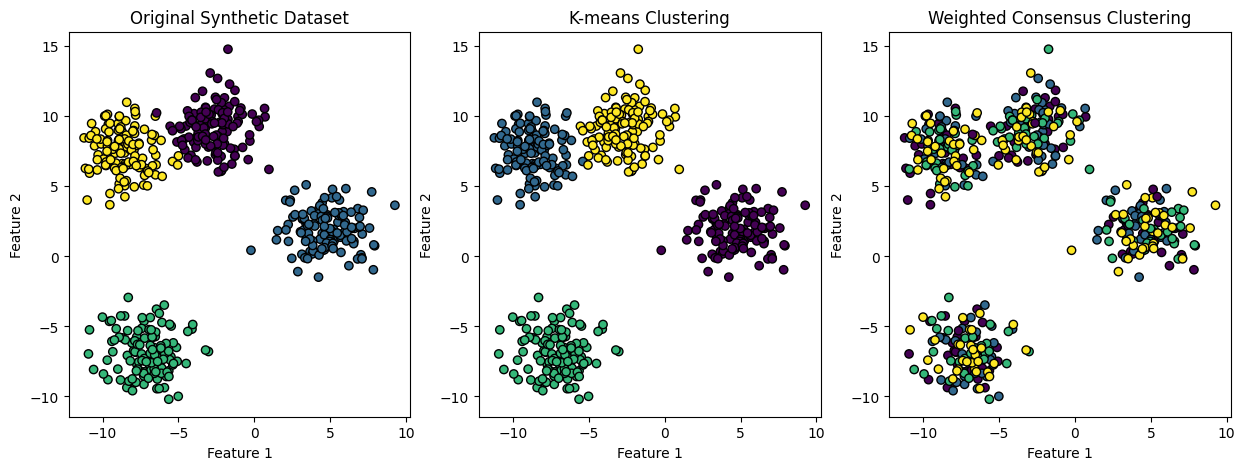

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Add the consensus_clustering function here.

# Generate synthetic dataset with overlapping Gaussian clusters
data, true_labels = make_blobs(n_samples=500, centers=4, cluster_std=[1.5, 1.5, 1.5, 1.5], random_state=42)

# Apply k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

# Apply weighted consensus clustering
n_clusters = 4
n_models = 5
weights = np.array([0.3, 0.25, 0.2, 0.15, 0.1])
consensus_labels = consensus_clustering(data, n_clusters, n_models, weights)

# Plot the results
plt.figure(figsize=(15, 5))

# Original synthetic dataset
plt.subplot(1, 3, 1)
plt.scatter(data[:, 0], data[:, 1], c=true_labels, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Synthetic Dataset')

# K-means clustering result
plt.subplot(1, 3, 2)
plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')

# Weighted consensus clustering result
plt.subplot(1, 3, 3)
plt.scatter(data[:, 0], data[:, 1], c=consensus_labels, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Weighted Consensus Clustering')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

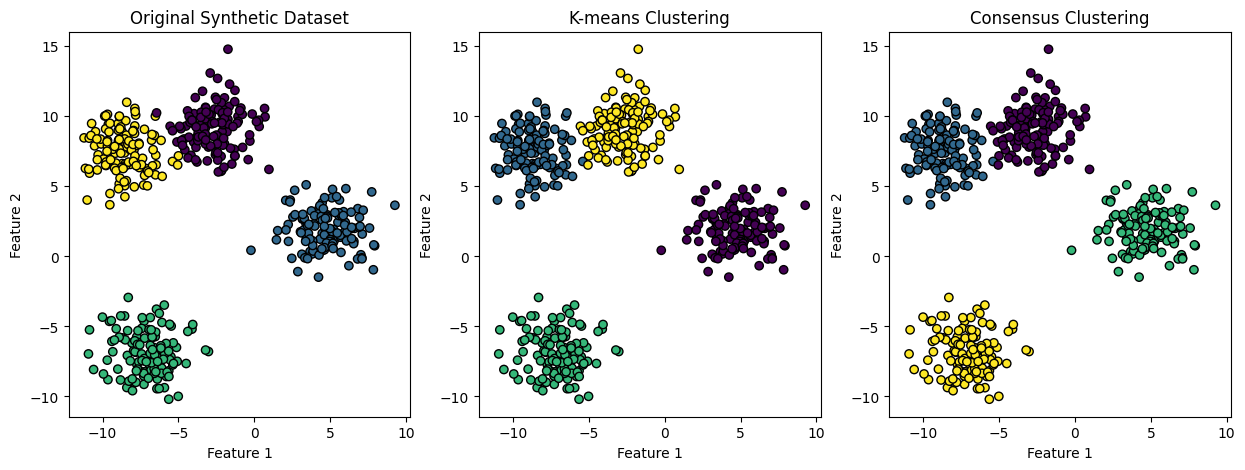

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.datasets import make_blobs
import itertools

def consensus_clustering(data, n_clusters, n_models):
    n_samples = data.shape[0]
    co_association_matrix = np.zeros((n_samples, n_samples))

    for _ in range(n_models):
        kmeans = KMeans(n_clusters=n_clusters, init='random')
        labels = kmeans.fit_predict(data)
        
        for label in range(n_clusters):
            cluster_indices = np.where(labels == label)[0]
            pairs = itertools.combinations(cluster_indices, 2)
            for i, j in pairs:
                co_association_matrix[i, j] += 1
                co_association_matrix[j, i] += 1

    co_association_matrix /= n_models

    spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
    final_labels = spectral_clustering.fit_predict(co_association_matrix)

    return final_labels

# Generate synthetic dataset with overlapping Gaussian clusters
data, true_labels = make_blobs(n_samples=500, centers=4, cluster_std=[1.5, 1.5, 1.5, 1.5], random_state=42)

# Apply k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

# Apply consensus clustering
n_clusters = 4
n_models = 5
consensus_labels = consensus_clustering(data, n_clusters, n_models)

# Plot the results
plt.figure(figsize=(15, 5))

# Original synthetic dataset
plt.subplot(1, 3, 1)
plt.scatter(data[:, 0], data[:, 1], c=true_labels, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Synthetic Dataset')

# K-means clustering result
plt.subplot(1, 3, 2)
plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')

# Consensus clustering result
plt.subplot(1, 3, 3)
plt.scatter(data[:, 0], data[:, 1], c=consensus_labels, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Consensus Clustering')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

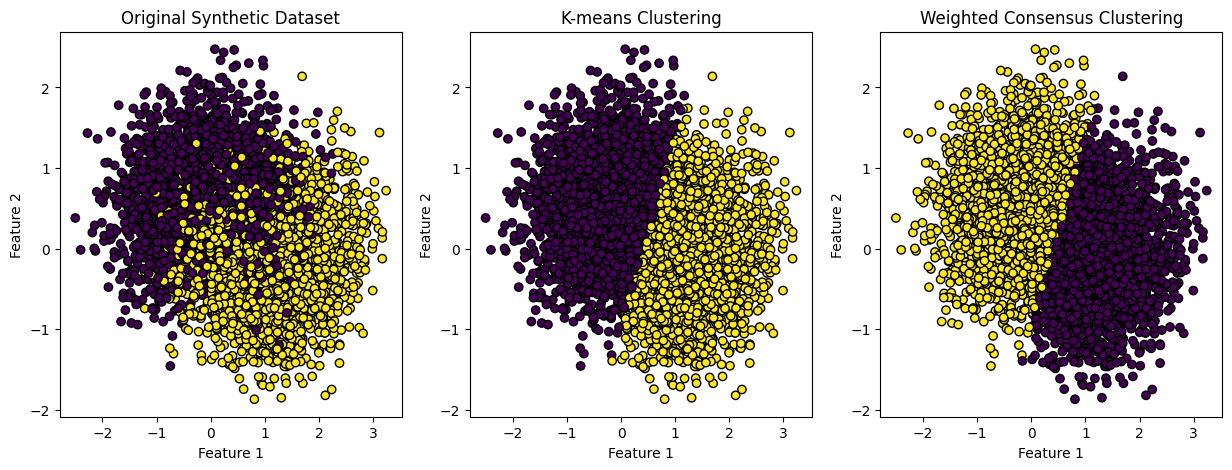

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

# Add the consensus_clustering function here.

# Generate synthetic dataset with complex structure
data, true_labels = make_moons(n_samples=5000, noise=0.5, random_state=42)

# Apply k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

# Apply weighted consensus clustering
n_clusters = 2
n_models = 5
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
consensus_labels = consensus_clustering(data, n_clusters, n_models)

# Plot the results
plt.figure(figsize=(15, 5))

# Original synthetic dataset
plt.subplot(1, 3, 1)
plt.scatter(data[:, 0], data[:, 1], c=true_labels, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Synthetic Dataset')

# K-means clustering result
plt.subplot(1, 3, 2)
plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')

# Weighted consensus clustering result
plt.subplot(1, 3, 3)
plt.scatter(data[:, 0], data[:, 1], c=consensus_labels, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Weighted Consensus Clustering')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[  2   8  10  12  15  20  22  36  37  41  45  46  47  54  64  68  70  78
  81  88  92  94  97 100 101 102 116 121 123 125 126 131 132 134 138 139
 142 143 152 153 162 163 166 187 204 207 208 219 220 224 229 231 238 239
 240 243 246 254 255 259 266 268 272 277 281 282 286 288 293 295 297 299
 302 303 305 308 309 312 313 314 317 318 319 321 322 334 339 340 341 348
 351 360 365 367 368 372 375 377 391 396 400 404 405 412 415 418 420 424
 429 430 436 441 443 449 450 456 459 461 463 465 467 478 480 488 499]
[  3   6  11  13  16  19  21  29  31  32  33  42  43  44  51  55  56  61
  74  76  79  83  89  96  98 105 106 108 120 147 148 149 154 156 165 171
 172 175 176 180 182 183 186 188 194 196 197 200 201 213 214 216 218 221
 223 225 226 232 236 242 247 248 250 251 252 253 257 260 261 263 267 270
 271 274 275 276 280 283 285 291 292 304 332 336 337 342 343 345 347 357
 359 361 370 382 386 392 393 397 398 399 403 411 414 416 417 419 421 425
 428 437 438 444 448 452 458 464 466 469 472 473 476 4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[  0  17  18  23  24  27  28  38  39  49  52  57  59  60  63  67  73  75
  84  85  86  87  90  95  99 103 104 107 109 111 112 113 114 117 124 129
 130 135 136 137 141 145 146 155 157 160 161 168 169 173 174 181 184 185
 191 192 198 203 205 209 210 212 217 222 234 244 245 256 262 273 278 287
 294 296 301 311 316 320 323 324 325 327 328 329 330 331 333 335 338 353
 354 356 364 369 374 376 378 379 381 384 388 390 401 407 422 427 434 439
 440 442 451 460 470 471 474 475 482 483 486 487 489 490 492 495]
[  2   8  10  12  15  20  22  36  37  41  45  46  47  54  64  68  70  78
  81  88  92  94  97 100 101 102 116 121 123 125 126 131 132 134 138 139
 142 143 152 153 162 163 166 187 204 207 208 219 220 224 229 231 238 239
 240 243 246 254 255 259 266 268 272 277 281 282 286 288 293 295 297 299
 302 303 305 308 309 312 313 314 317 318 319 321 322 334 339 340 341 348
 351 360 365 367 368 372 375 377 391 396 400 404 405 412 415 418 420 424
 429 430 436 441 443 449 450 456 459 461 463 465 467 478 4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[  0  17  18  23  24  27  28  38  39  49  52  57  59  60  63  67  73  75
  84  85  86  87  90  95  99 103 104 107 109 111 112 113 114 117 124 129
 130 135 136 137 141 145 146 155 157 160 161 168 169 173 174 181 184 185
 191 192 198 203 205 209 210 212 217 222 234 244 245 256 262 273 278 287
 294 296 301 311 316 320 323 324 325 327 328 329 330 331 333 335 338 353
 354 356 364 369 374 376 378 379 381 384 388 390 401 407 422 427 434 439
 440 442 451 460 470 471 474 475 482 483 486 487 489 490 492 495]
[  3   6  11  13  16  19  21  29  31  32  33  42  43  44  51  55  56  61
  74  76  79  83  89  96  98 105 106 108 120 147 148 149 154 156 165 171
 172 175 176 180 182 183 186 188 194 196 197 200 201 213 214 216 218 221
 223 225 226 232 236 242 247 248 250 251 252 253 257 260 261 263 267 270
 271 274 275 276 280 283 285 291 292 304 332 336 337 342 343 345 347 357
 359 361 370 382 386 392 393 397 398 399 403 411 414 416 417 419 421 425
 428 437 438 444 448 452 458 464 466 469 472 473 476 481 4

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


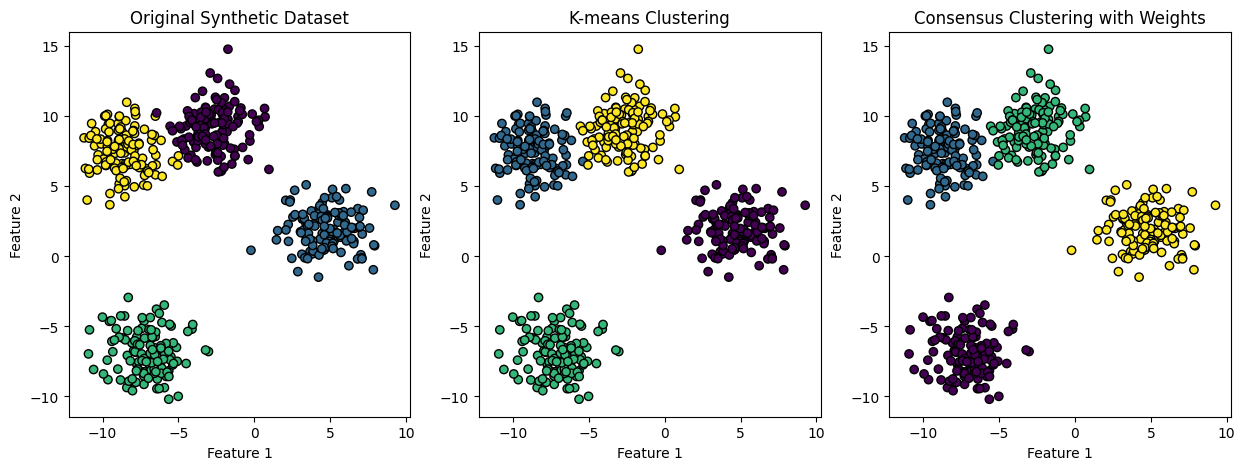

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.datasets import make_blobs
import itertools

def consensus_clustering(data, n_clusters, n_models, weights=None):
    n_samples = data.shape[0]
    
    if weights is None:
        weights = np.ones(n_models)
    
    if len(weights) != n_models:
        raise ValueError("The number of weights must be equal to the number of models.")
    
    weights = weights / np.sum(weights)

    co_association_matrix = np.zeros((n_samples, n_samples))

    for i in range(n_models):
        kmeans = KMeans(n_clusters=n_clusters, init='random')
        labels = kmeans.fit_predict(data)
        
        for label in range(n_clusters):
            cluster_indices = np.where(labels == label)[0]
            pairs = itertools.combinations(cluster_indices, 2)
            print(cluster_indices)
            for x,y in pairs:
                # print(pairs)
                # print(i)
                # print("J")
                # print(j)
                co_association_matrix[x,y ] += weights[i]
                co_association_matrix[y,x] += weights[i]

    spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
    final_labels = spectral_clustering.fit_predict(co_association_matrix)

    return final_labels

# Generate synthetic dataset with overlapping Gaussian clusters
data, true_labels = make_blobs(n_samples=500, centers=4, cluster_std=[1.5, 1.5, 1.5, 1.5], random_state=42)

# Apply k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

# Apply consensus clustering
n_clusters = 4
n_models = 5
weights = np.array([0.3, 0.25, 0.2, 0.15, 0.1])
consensus_labels = consensus_clustering(data, n_clusters, n_models, weights)

# Plot the results
plt.figure(figsize=(15, 5))

# Original synthetic dataset
plt.subplot(1, 3, 1)
plt.scatter(data[:, 0], data[:, 1], c=true_labels, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Synthetic Dataset')

# K-means clustering result
plt.subplot(1, 3, 2)
plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')

# Consensus clustering result
plt.subplot(1, 3, 3)
plt.scatter(data[:, 0], data[:, 1], c=consensus_labels, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Consensus Clustering with Weights')

plt.show()


In [21]:
pairs

NameError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

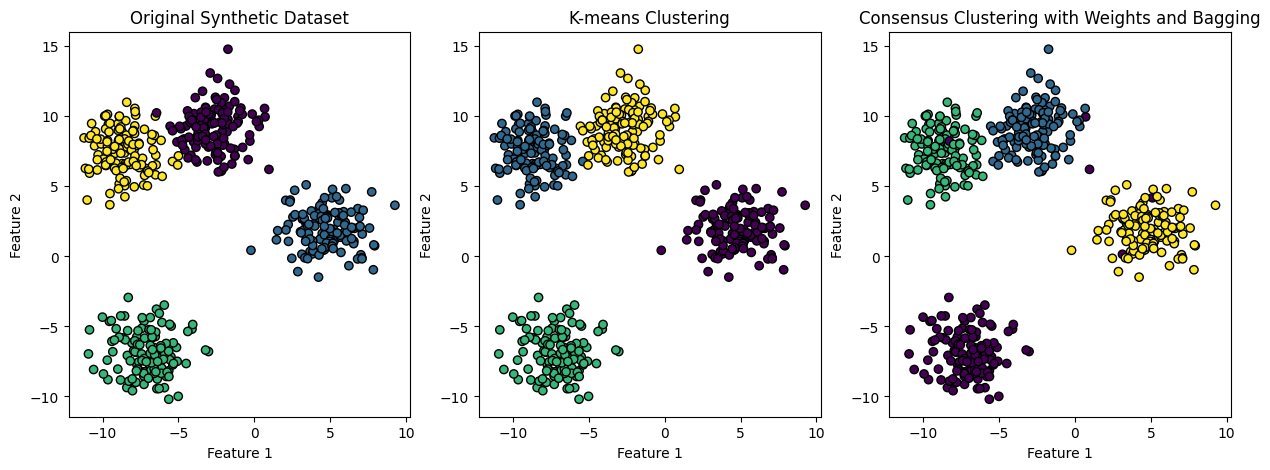

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.datasets import make_blobs
import itertools

def consensus_clustering(data, n_clusters, n_models, weights=None, sampling_rate=0.8):
    n_samples = data.shape[0]
    
    if weights is None:
        weights = np.ones(n_models)
    
    if len(weights) != n_models:
        raise ValueError("The number of weights must be equal to the number of models.")
    
    weights = weights / np.sum(weights)

    co_association_matrix = np.zeros((n_samples, n_samples))

    for i in range(n_models):
        kmeans = KMeans(n_clusters=n_clusters, init='random')
        sampled_indices = np.random.choice(n_samples, int(n_samples * sampling_rate), replace=True)
        sampled_data = data[sampled_indices]
        labels = kmeans.fit_predict(sampled_data)
        
        for label in range(n_clusters):
            cluster_indices = np.where(labels == label)[0]
            original_indices = sampled_indices[cluster_indices]
            pairs = itertools.combinations(original_indices, 2)
            for x, y in pairs:
                co_association_matrix[x, y] += weights[i]
                co_association_matrix[y, x] += weights[i]

    spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
    final_labels = spectral_clustering.fit_predict(co_association_matrix)

    return final_labels


# Generate synthetic dataset with overlapping Gaussian clusters
data, true_labels = make_blobs(n_samples=500, centers=4, cluster_std=[1.5, 1.5, 1.5, 1.5], random_state=42)

# Apply k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

# Apply consensus clustering
n_clusters = 4
n_models = 5
weights = np.array([0.3, 0.25, 0.2, 0.15, 0.1])
sampling_rate = 0.8
consensus_labels = consensus_clustering(data, n_clusters, n_models, weights, sampling_rate)

# Plot the results
plt.figure(figsize=(15, 5))

# Original synthetic dataset
plt.subplot(1, 3, 1)
plt.scatter(data[:, 0], data[:, 1], c=true_labels, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Synthetic Dataset')

# K-means clustering result
plt.subplot(1, 3, 2)
plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')

# Consensus clustering result
plt.subplot(1, 3, 3)
plt.scatter(data[:, 0], data[:, 1], c=consensus_labels, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Consensus Clustering with Weights and Bagging')

plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

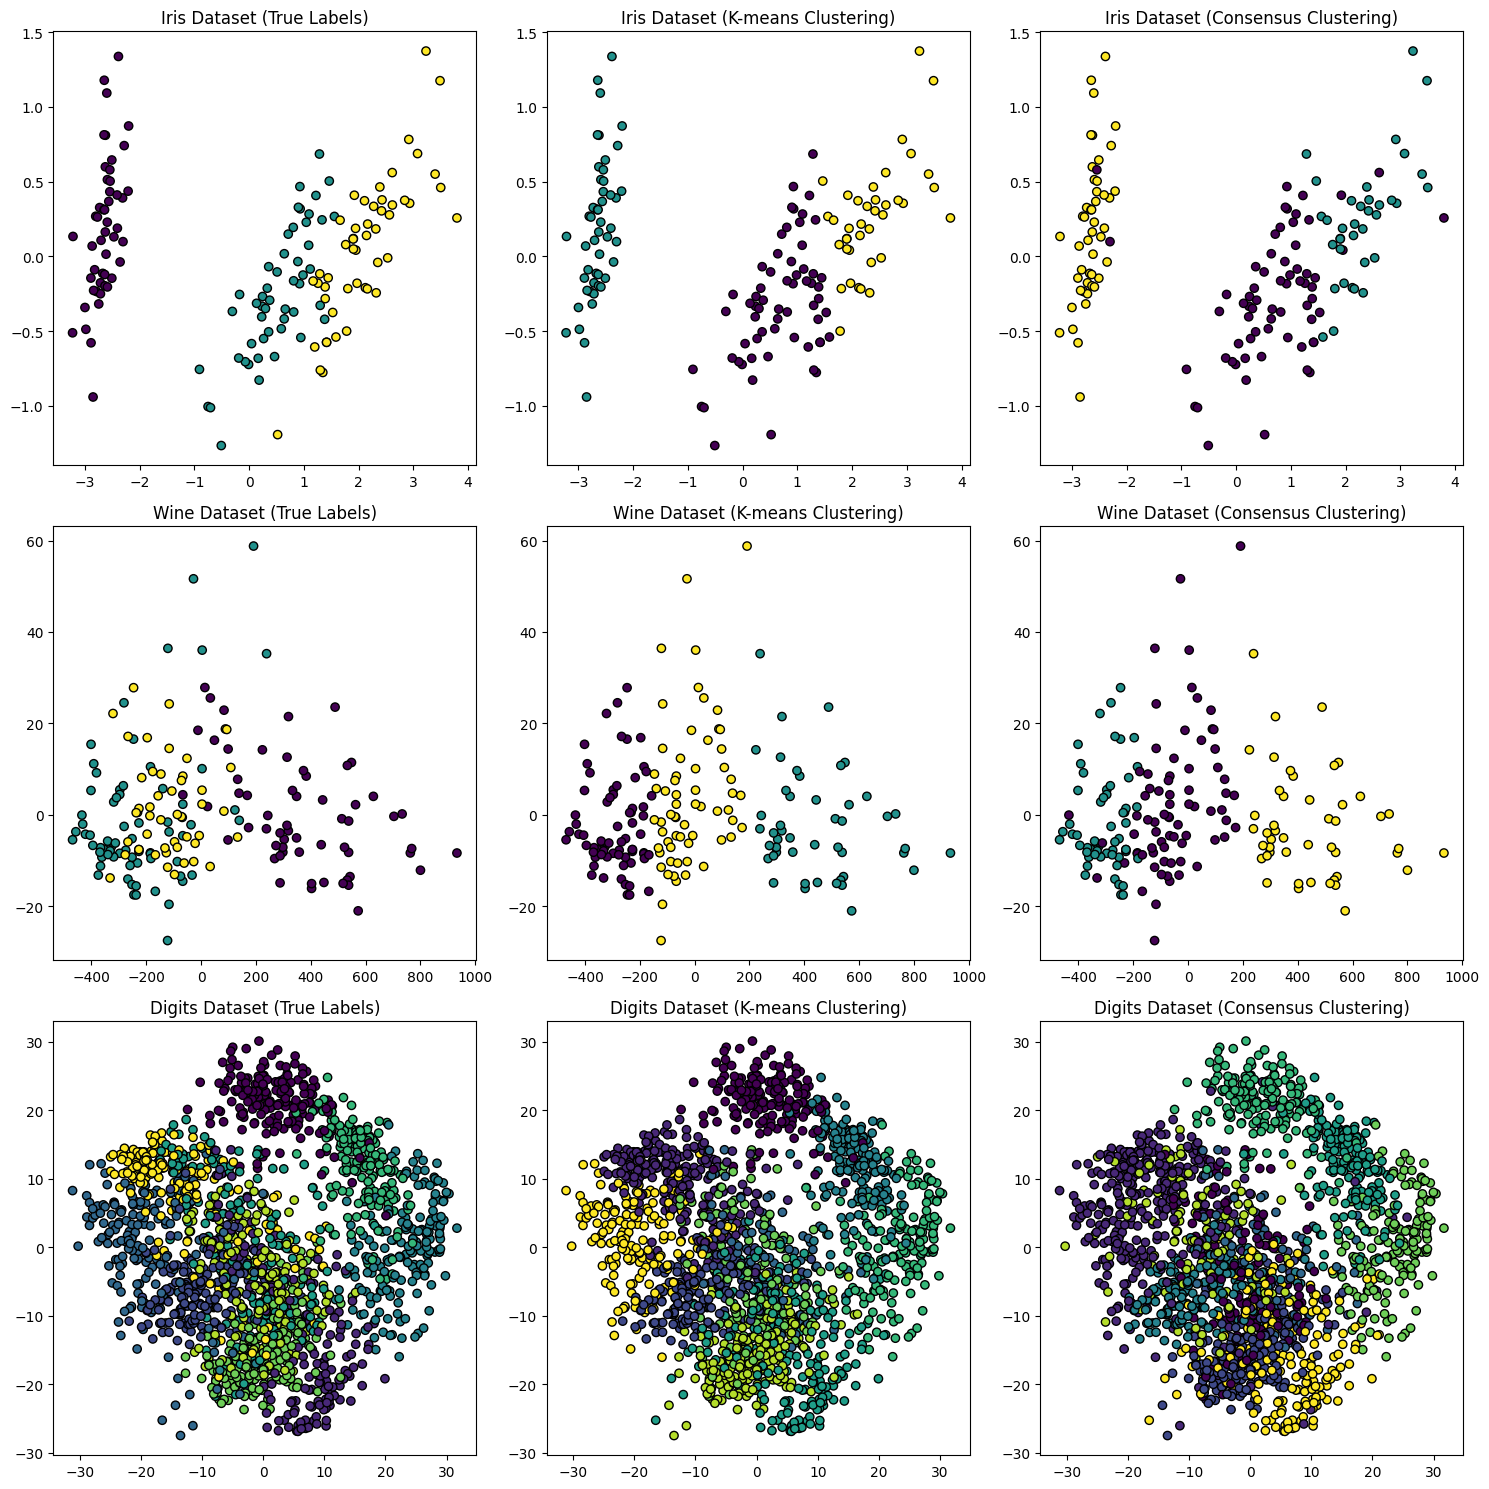

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.datasets import load_iris, load_wine, load_digits
from sklearn.decomposition import PCA
import itertools


# Load datasets
iris_data, iris_labels = load_iris(return_X_y=True)
wine_data, wine_labels = load_wine(return_X_y=True)
digits_data, digits_labels = load_digits(return_X_y=True)

# Define the number of clusters for each dataset
iris_clusters = 3
wine_clusters = 3
digits_clusters = 10

# Apply PCA for visualization
pca = PCA(n_components=2)
iris_data_pca = pca.fit_transform(iris_data)
wine_data_pca = pca.fit_transform(wine_data)
digits_data_pca = pca.fit_transform(digits_data)

# Apply k-means clustering
iris_kmeans_labels = KMeans(n_clusters=iris_clusters, random_state=42).fit_predict(iris_data)
wine_kmeans_labels = KMeans(n_clusters=wine_clusters, random_state=42).fit_predict(wine_data)
digits_kmeans_labels = KMeans(n_clusters=digits_clusters, random_state=42).fit_predict(digits_data)

# Apply consensus clustering
n_models = 5
weights = np.array([0.3, 0.25, 0.2, 0.15, 0.1])
sampling_rate = 0.8

# Test the consensus clustering function with multiple models
n_models = 5
model_funcs = [kmeans_model_func,kmeans_model_func,kmeans_model_func,kmeans_model_func, optics_DB_Scan_model_func]
weights = np.array([0.2,0.2, 0.2,0.2,0.2])
sampling_rate = 0.9

# n_models = 1
# model_funcs = [dbscan_model_func]
# weights = np.array([1])
# sampling_rate = 1

iris_consensus_labels = consensus_clustering(iris_data, iris_clusters, model_funcs, weights, sampling_rate)
wine_consensus_labels = consensus_clustering(wine_data, wine_clusters, model_funcs, weights, sampling_rate)
digits_consensus_labels = consensus_clustering(digits_data, digits_clusters, model_funcs, weights, sampling_rate)


# iris_consensus_labels = consensus_clustering(iris_data, iris_clusters, n_models, weights, sampling_rate)
# wine_consensus_labels = consensus_clustering(wine_data, wine_clusters, n_models, weights, sampling_rate)
# digits_consensus_labels = consensus_clustering(digits_data, digits_clusters, n_models, weights, sampling_rate)

# Plot the results
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Iris dataset
axes[0, 0].scatter(iris_data_pca[:, 0], iris_data_pca[:, 1], c=iris_labels, cmap='viridis', edgecolors='k')
axes[0, 0].set_title('Iris Dataset (True Labels)')

axes[0, 1].scatter(iris_data_pca[:, 0], iris_data_pca[:, 1], c=iris_kmeans_labels, cmap='viridis', edgecolors='k')
axes[0, 1].set_title('Iris Dataset (K-means Clustering)')

axes[0, 2].scatter(iris_data_pca[:, 0], iris_data_pca[:, 1], c=iris_consensus_labels, cmap='viridis', edgecolors='k')
axes[0, 2].set_title('Iris Dataset (Consensus Clustering)')

# Wine dataset
axes[1, 0].scatter(wine_data_pca[:, 0], wine_data_pca[:, 1], c=wine_labels, cmap='viridis', edgecolors='k')
axes[1, 0].set_title('Wine Dataset (True Labels)')

axes[1, 1].scatter(wine_data_pca[:, 0], wine_data_pca[:, 1], c=wine_kmeans_labels, cmap='viridis', edgecolors='k')
axes[1, 1].set_title('Wine Dataset (K-means Clustering)')

axes[1, 2].scatter(wine_data_pca[:, 0], wine_data_pca[:, 1], c=wine_consensus_labels, cmap='viridis', edgecolors='k')
axes[1, 2].set_title('Wine Dataset (Consensus Clustering)')

# Digits dataset
axes[2, 0].scatter(digits_data_pca[:, 0], digits_data_pca[:, 1], c=digits_labels, cmap='viridis', edgecolors='k')
axes[2, 0].set_title('Digits Dataset (True Labels)')

axes[2, 1].scatter(digits_data_pca[:, 0], digits_data_pca[:, 1], c=digits_kmeans_labels, cmap='viridis', edgecolors='k')
axes[2, 1].set_title('Digits Dataset (K-means Clustering)')

axes[2, 2].scatter(digits_data_pca[:, 0], digits_data_pca[:, 1], c=digits_consensus_labels, cmap='viridis', edgecolors='k')
axes[2, 2].set_title('Digits Dataset (Consensus Clustering)')

# Adjust plot layout
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


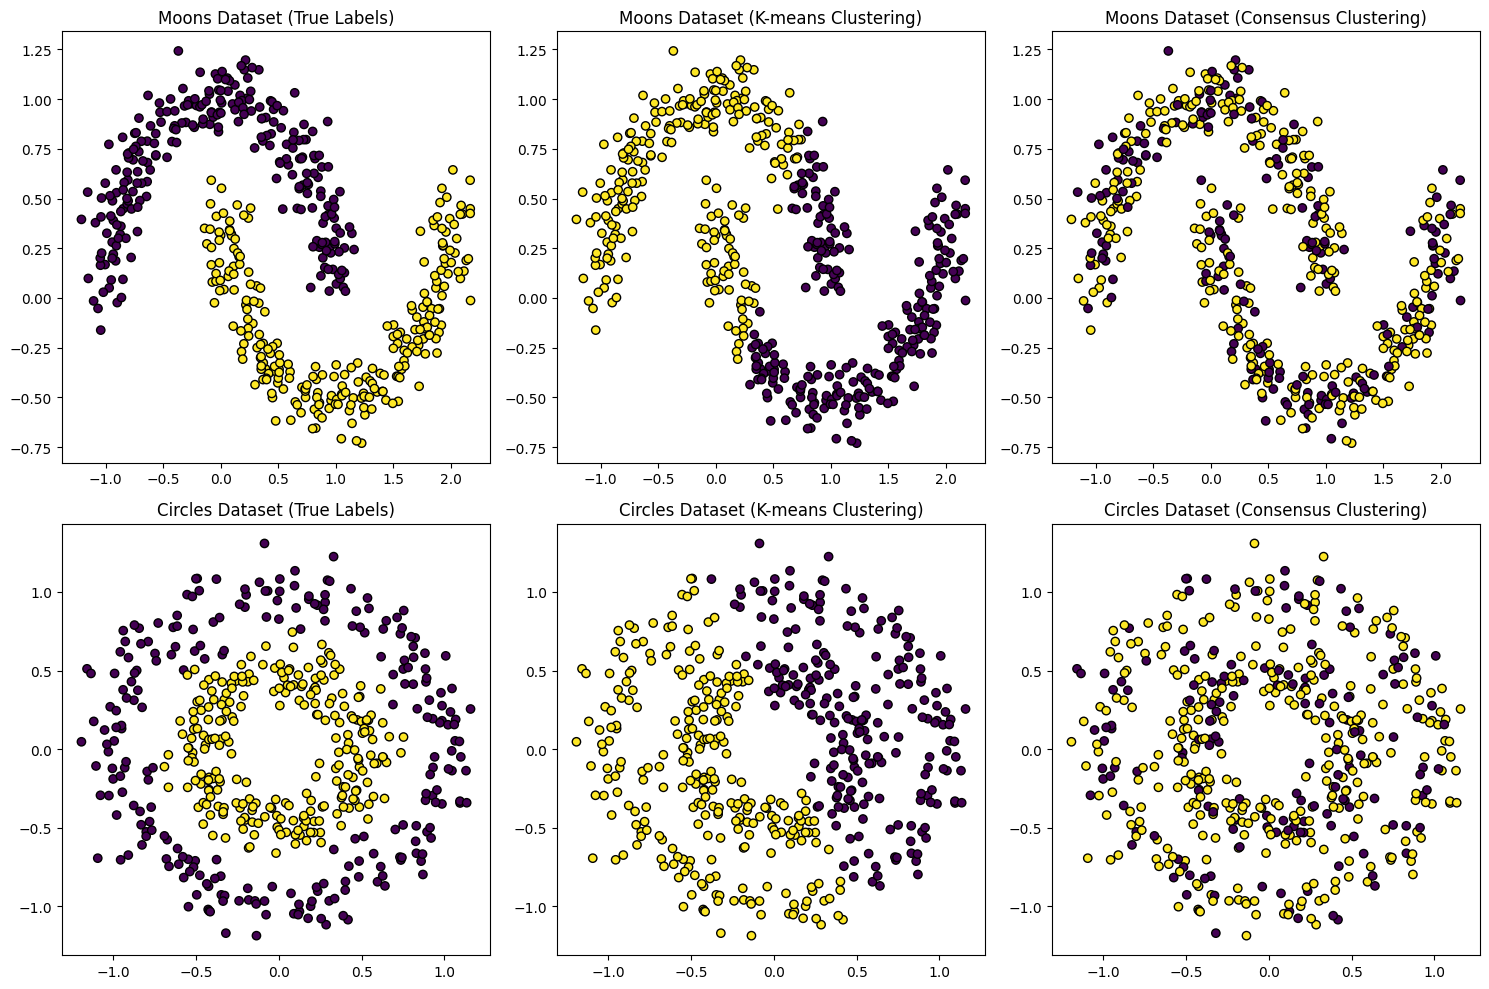

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.datasets import make_moons, make_circles
import itertools


# Generate synthetic datasets
moons_data, moons_labels = make_moons(n_samples=500, noise=0.1, random_state=42)
circles_data, circles_labels = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)

# Define the number of clusters for each dataset
moons_clusters = 2
circles_clusters = 2

# Apply k-means clustering
moons_kmeans_labels = KMeans(n_clusters=moons_clusters, random_state=42).fit_predict(moons_data)
circles_kmeans_labels = KMeans(n_clusters=circles_clusters, random_state=42).fit_predict(circles_data)

# Test the consensus clustering function with multiple models
n_models = 5
model_funcs = [optics_DB_Scan_model_func,optics_DB_Scan_model_func,optics_DB_Scan_model_func,optics_DB_Scan_model_func, optics_DB_Scan_model_func]
weights = np.array([0.2,0.2, 0.2,0.2,0.2])
sampling_rate = 0.9


moons_consensus_labels = consensus_clustering(moons_data, moons_clusters, model_funcs, weights, sampling_rate)
circles_consensus_labels = consensus_clustering(circles_data, circles_clusters, model_funcs, weights, sampling_rate)


# Plot the results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Moons dataset
axes[0, 0].scatter(moons_data[:, 0], moons_data[:, 1], c=moons_labels, cmap='viridis', edgecolors='k')
axes[0, 0].set_title('Moons Dataset (True Labels)')

axes[0, 1].scatter(moons_data[:, 0], moons_data[:, 1], c=moons_kmeans_labels, cmap='viridis', edgecolors='k')
axes[0, 1].set_title('Moons Dataset (K-means Clustering)')

axes[0, 2].scatter(moons_data[:, 0], moons_data[:, 1], c=moons_consensus_labels, cmap='viridis', edgecolors='k')
axes[0, 2].set_title('Moons Dataset (Consensus Clustering)')

# Circles dataset
axes[1, 0].scatter(circles_data[:, 0], circles_data[:, 1], c=circles_labels, cmap='viridis', edgecolors='k')
axes[1, 0].set_title('Circles Dataset (True Labels)')

axes[1, 1].scatter(circles_data[:, 0], circles_data[:, 1], c=circles_kmeans_labels, cmap='viridis', edgecolors='k')
axes[1, 1].set_title('Circles Dataset (K-means Clustering)')

axes[1, 2].scatter(circles_data[:, 0], circles_data[:, 1], c=circles_consensus_labels, cmap='viridis', edgecolors='k')
axes[1, 2].set_title('Circles Dataset (Consensus Clustering)')

# Adjust plot layout
plt.tight_layout()
plt.show()


In [119]:
def consensus_clustering(data, n_clusters, model_funcs, weights=None, sampling_rate=0.8, random_state=None):
    n_samples = data.shape[0]
    n_models = len(model_funcs)

    if weights is None:
        weights = np.ones(n_models)

    if len(weights) != n_models:
        raise ValueError("The number of weights must be equal to the number of models.")

    weights = weights / np.sum(weights)

    co_association_matrix = np.zeros((n_samples, n_samples))

    for i in range(n_models):
        model_func = model_funcs[i]
        model = model_func(n_clusters, random_state)
        sampled_indices = np.random.choice(n_samples, int(n_samples * sampling_rate), replace=True)
        sampled_data = data[sampled_indices]
        labels = model.fit_predict(sampled_data)

        for label in range(n_clusters):
            cluster_indices = np.where(labels == label)[0]
            original_indices = sampled_indices[cluster_indices]
            pairs = itertools.combinations(original_indices, 2)
            for x, y in pairs:
                co_association_matrix[x, y] += weights[i]
                co_association_matrix[y, x] += weights[i]

    spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
    final_labels = spectral_clustering.fit_predict(co_association_matrix)

    return final_labels


In [120]:
#use this function for weighted consensus method, it has it's issues like the fit to complex shapes irrespective of the underlying model, the spectral clustering of the affinity matrix makes this tricky. This is definitely a shortfall of the method

def consensus_clustering(data, n_clusters, model_funcs, weights=None, sampling_rate=0.8, random_state=None):
    n_samples = data.shape[0]
    n_models = len(model_funcs)

    if weights is None:
        weights = np.ones(n_models)

    if len(weights) != n_models:
        raise ValueError("The number of weights must be equal to the number of models.")

    weights = weights / np.sum(weights)

    co_association_matrix = np.zeros((n_samples, n_samples))

    for i in range(n_models):
        model_func = model_funcs[i]
        model = model_func(n_clusters, random_state)
        sampled_indices = np.random.choice(n_samples, int(n_samples * sampling_rate), replace=True)
        sampled_data = data[sampled_indices]
        
        if callable(model):
            labels = model(sampled_data)
        else:
            labels = model.fit_predict(sampled_data)

        for label in range(n_clusters):
            cluster_indices = np.where(labels == label)[0]
            original_indices = sampled_indices[cluster_indices]
            pairs = itertools.combinations(original_indices, 2)
            for x, y in pairs:
                co_association_matrix[x, y] += weights[i]
                co_association_matrix[y, x] += weights[i]

    spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
    final_labels = spectral_clustering.fit_predict(co_association_matrix)

    return final_labels


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


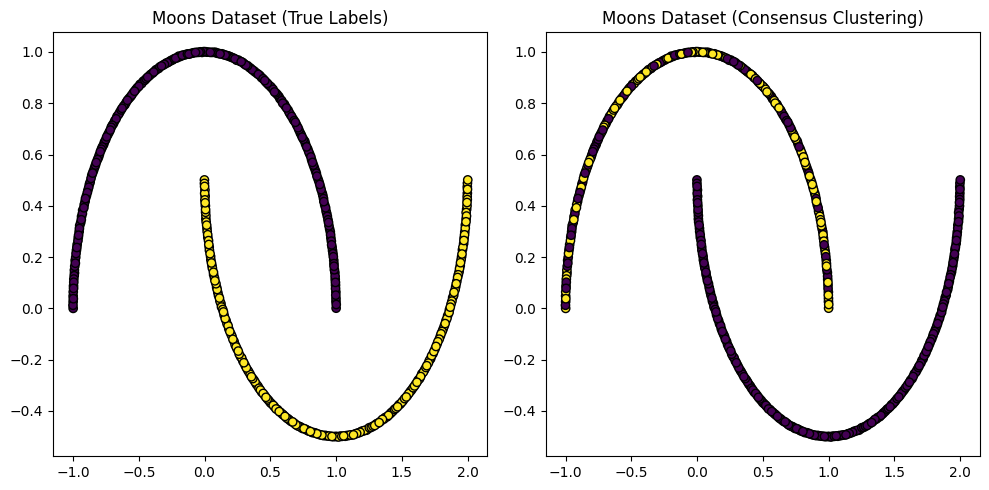

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_moons
import itertools

from sklearn.cluster import DBSCAN

from sklearn.cluster import OPTICS, cluster_optics_dbscan






# Load the moons dataset
moons_data, moons_labels = make_moons(n_samples=500, noise=0.001, random_state=42)
n_clusters = 2

# Model functions for k-means and Agglomerative clustering
def kmeans_model_func(n_clusters, random_state):
    return KMeans(n_clusters=n_clusters, random_state=random_state)

def agglomerative_model_func(n_clusters, random_state):
    return AgglomerativeClustering(n_clusters=n_clusters)

def dbscan_model_func(n_clusters, random_state):
    return DBSCAN(eps=0.15, min_samples=10)

def optics_model_func(n_clusters, random_state):
    return OPTICS(min_samples=1, xi=0.5, cluster_method='xi', n_jobs=-1)

def optics_DB_Scan_model_func(n_clusters, random_state):
    def optics_instance(data):
        optics = OPTICS(min_samples=1, n_jobs=-1)
        optics.fit(data)
        eps = np.partition(optics.reachability_[optics.ordering_], n_clusters - 1)[n_clusters - 1]
        labels = cluster_optics_dbscan(reachability=optics.reachability_,
                                       core_distances=optics.core_distances_,
                                       ordering=optics.ordering_,
                                       eps=eps)
        return labels

    return optics_instance   

# # Test the consensus clustering function with multiple models
# n_models = 2
# model_funcs = [kmeans_model_func, optics_DB_Scan_model_func]
# weights = np.array([0.9,0.1])
# sampling_rate = 0.9

n_models = 1
model_funcs = [dbscan_model_func]
weights = np.array([1])
sampling_rate = 1

moons_consensus_labels = consensus_clustering(moons_data, n_clusters, model_funcs, weights, sampling_rate)


# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Moons dataset (True Labels)
axes[0].scatter(moons_data[:, 0], moons_data[:, 1], c=moons_labels, cmap='viridis', edgecolors='k')
axes[0].set_title('Moons Dataset (True Labels)')

# Moons dataset (Consensus Clustering)
axes[1].scatter(moons_data[:, 0], moons_data[:, 1], c=moons_consensus_labels, cmap='viridis', edgecolors='k')
axes[1].set_title('Moons Dataset (Consensus Clustering)')

plt.tight_layout()
plt.show()


In [111]:
from sklearn.cluster import AgglomerativeClustering

def consensus_clustering(data, n_clusters, model_funcs, weights=None, sampling_rate=0.8, random_state=None):
    n_samples = data.shape[0]
    n_models = len(model_funcs)

    if weights is None:
        weights = np.ones(n_models)

    if len(weights) != n_models:
        raise ValueError("The number of weights must be equal to the number of models.")

    weights = weights / np.sum(weights)

    co_association_matrix = np.zeros((n_samples, n_samples))

    for i in range(n_models):
        model_func = model_funcs[i]
        model = model_func(n_clusters, random_state)
        sampled_indices = np.random.choice(n_samples, int(n_samples * sampling_rate), replace=True)
        sampled_data = data[sampled_indices]
        
        if callable(model):
            labels = model(sampled_data)
        else:
            labels = model.fit_predict(sampled_data)

        for label in range(n_clusters):
            cluster_indices = np.where(labels == label)[0]
            original_indices = sampled_indices[cluster_indices]
            pairs = itertools.combinations(original_indices, 2)
            for x, y in pairs:
                co_association_matrix[x, y] += weights[i]
                co_association_matrix[y, x] += weights[i]

    agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='average')
    final_labels = agglomerative_clustering.fit_predict(1 - co_association_matrix)

    return final_labels


In [100]:
def consensus_clustering(data, n_clusters, model_funcs, weights=None, sampling_rate=0.8, random_state=None):
    n_samples = data.shape[0]
    n_models = len(model_funcs)

    if weights is None:
        weights = np.ones(n_models)

    if len(weights) != n_models:
        raise ValueError("The number of weights must be equal to the number of models.")

    weights = weights / np.sum(weights)

    co_association_matrix = np.zeros((n_samples, n_samples))

    for i in range(n_models):
        model_func = model_funcs[i]
        model = model_func(n_clusters, random_state)
        sampled_indices = np.random.choice(n_samples, int(n_samples * sampling_rate), replace=True)
        sampled_data = data[sampled_indices]
        
        if callable(model):
            labels = model(sampled_data)
        else:
            labels = model.fit_predict(sampled_data)

        for label in range(n_clusters):
            cluster_indices = np.where(labels == label)[0]
            original_indices = sampled_indices[cluster_indices]
            pairs = itertools.combinations(original_indices, 2)
            for x, y in pairs:
                co_association_matrix[x, y] += weights[i]
                co_association_matrix[y, x] += weights[i]

    distance_matrix = np.max(co_association_matrix) - co_association_matrix
    dbscan = DBSCAN(eps=0.5, min_samples=5, metric='precomputed')
    final_labels = dbscan.fit_predict(distance_matrix)

    return final_labels
